# Analysis of Fumagalli et al. (2020)

## Documentation

The __[API - Documentation](https://manuelbieri.ch/Fumagalli_2020)__ of the package provides the following information:
- Installation instructions
- Explanations about the models
- Available methods and their usage for every model

The paper, which constitutes the foundation of this program, can be found __[here](https://autopapers.ssrn.com/sol3/papers.cfm?abstract_id=3674889)__. On __[GitHub](https://github.com/manuelbieri/Fumagalli_2020)__ you can find the source code for this project.

### Class hierarchy

__![UML - Class diagram](../../assets/visual/class_diagram.svg)__

In [14]:
# setup environment

# increase quality of plots
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format ='svg'
plt.rcParams["figure.dpi"] = 600

# install and import models
#%pip install Fumagalli_Motta_Tarantino_2020
#%pip uninstall Fumagalli_Motta_Tarantino_2020

# import utilities for plots
from Fumagalli_Motta_Tarantino_2020.Notebooks.NotebookUtilities import *
import Fumagalli_Motta_Tarantino_2020 as FMT20


FMT20.IVisualize.fontsize = "medium"

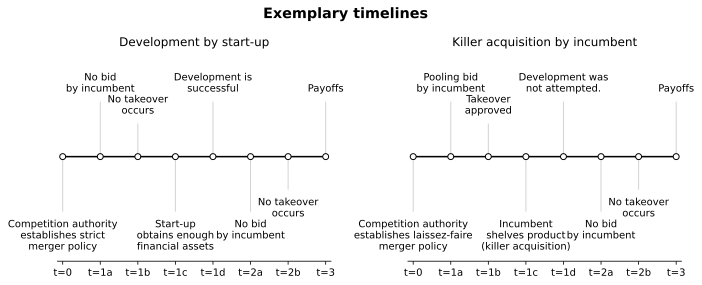

In [2]:
configure_two_axes(
    main="Exemplary timelines",
    sub1="Development by start-up",
    sub2="Killer acquisition by incumbent",
    c1=10,
    c2=10,
    v1=FMT20.Timeline,
    v2=FMT20.Timeline,
    sub_x_label="",
    policy2=FMT20.MergerPolicies.Laissez_faire,
).show()

## Fundamentals



## Optimal Merger Policy

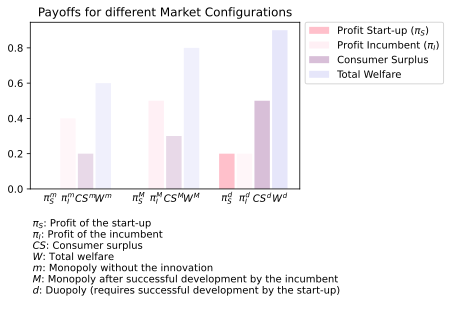

In [3]:
FMT20.Payoffs(FMT20.OptimalMergerPolicy()).show()

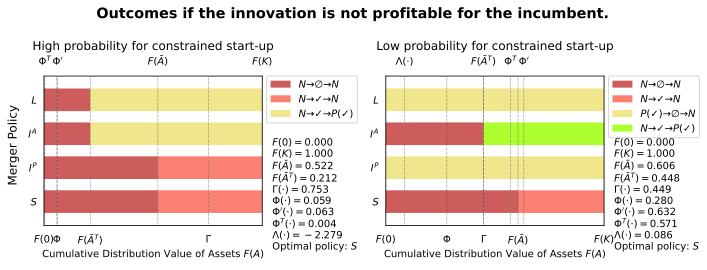

In [4]:
configure_two_axes(
    main="Outcomes if the innovation is not profitable for the incumbent.",
    sub1="High probability for constrained start-up",
    sub2="Low probability for constrained start-up",
    c1=11,
    c2=12,
).show()

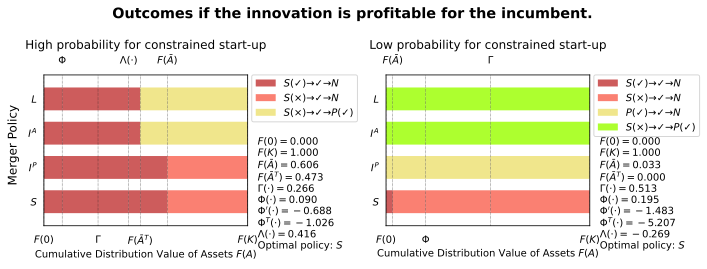

In [5]:
configure_two_axes(
    main="Outcomes if the innovation is profitable for the incumbent.",
    sub1="High probability for constrained start-up",
    sub2="Low probability for constrained start-up",
    c1=13,
    c2=14,
).show()

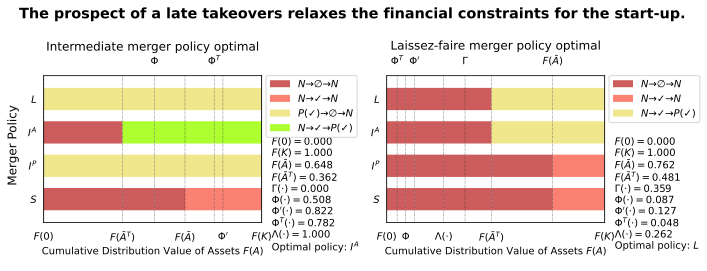

In [6]:
configure_two_axes(
    main="The prospect of a late takeovers relaxes the financial constraints for the start-up.",
    sub1="Intermediate merger policy optimal",
    sub2="Laissez-faire merger policy optimal",
    c1=15,
    c2=16,
).show()

## Pro Competitive

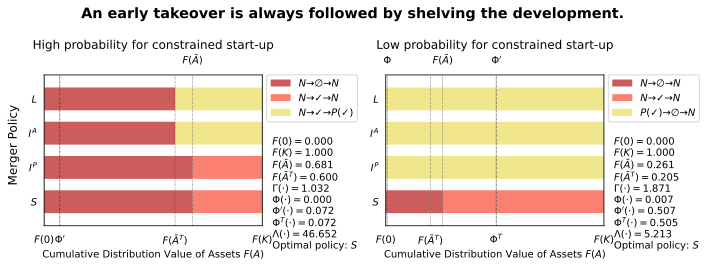

In [7]:
configure_two_axes(
    main="An early takeover is always followed by shelving the development.",
    sub1="High probability for constrained start-up",
    sub2="Low probability for constrained start-up",
    c1=33,
    c2=32,
).show()

## Waste of Resources

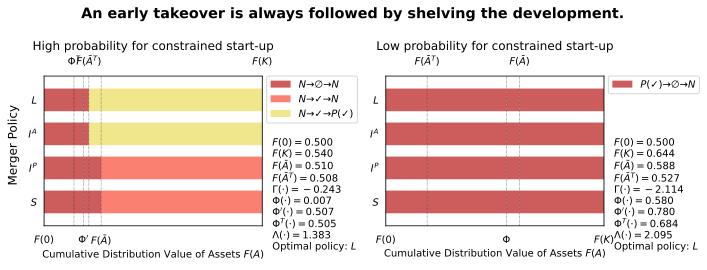

In [8]:
configure_two_axes(
    main="An early takeover is always followed by shelving the development.",
    sub1="High probability for constrained start-up",
    sub2="Low probability for constrained start-up",
    c1=41,
    c2=43,
).show()

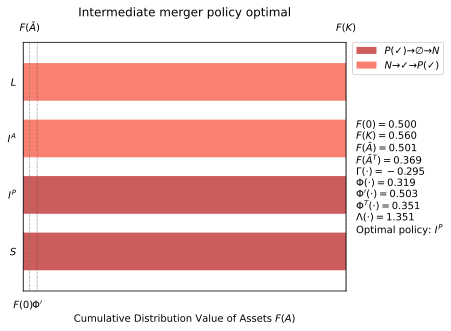

In [9]:
FMT20.MergerPoliciesAssetRange(get_model_by_id(42)).show(
    **get_plot_kwargs("Intermediate merger policy optimal")
)

## Perfect Information

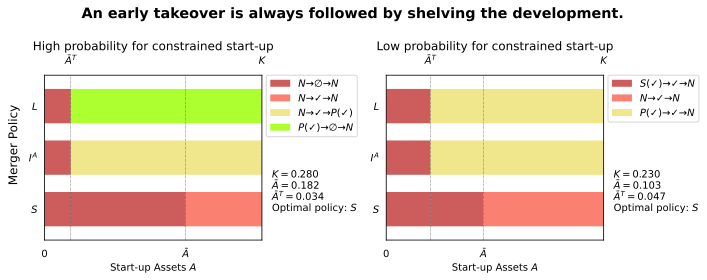

In [10]:
configure_two_axes(
    main="An early takeover is always followed by shelving the development.",
    sub1="High probability for constrained start-up",
    sub2="Low probability for constrained start-up",
    c1=50,
    c2=51,
    v1=FMT20.MergerPoliciesAssetRangePerfectInformation,
    v2=FMT20.MergerPoliciesAssetRangePerfectInformation,
    prefered_type=FMT20.PerfectInformation,
).show()

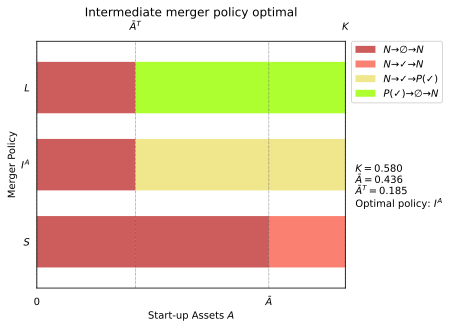

In [11]:
FMT20.MergerPoliciesAssetRangePerfectInformation(
    get_model_by_id(52, prefered_type=FMT20.PerfectInformation)
).show(
    **get_plot_kwargs(
        title="Intermediate merger policy optimal", y_label="Merger Policy"
    )
)

In [12]:
import ipywidgets as widgets

FMT20.IVisualize.fontsize = "x-small"
base_model = FMT20.OptimalMergerPolicy()

layout_slider = widgets.Layout(width="300px")
layout_widget = widgets.Layout(width="280px", height="25px", margin_left="50")
K = widgets.FloatSlider(
    value=0.1, min=0.01, max=0.19, step=0.01, description="$K$", layout=layout_slider
)
A = widgets.FloatSlider(
    value=0.05, min=0.0, max=0.1, step=0.01, description="$A$", layout=layout_slider
)
p = widgets.FloatSlider(
    value=0.7, min=0.6, max=0.8, step=0.01, description="$p$", layout=layout_slider
)
B = widgets.FloatSlider(
    value=0.05, min=0.0, max=0.1, step=0.01, description="$B$", layout=layout_slider
)
success = widgets.Dropdown(
    options=[True, False],
    value=True,
    description="Development success (if attempted)",
    layout=layout_widget,
)
policy = widgets.Dropdown(
    options=["Strict", "Laissez-faire"],
    value="Strict",
    description="Merger Policy",
    layout=layout_widget,
)
model_str = widgets.Dropdown(
    options=[
        "OptimalMergerPolicy",
        "MicroFoundation",
        "ProCompetitive",
        "ResourceWaste",
    ],
    value="OptimalMergerPolicy",
    layout=layout_widget,
)


def policy_parser(policy_str: str):
    if policy_str == "Strict":
        return FMT20.MergerPolicies.Strict
    if policy_str == "Laissez-faire":
        return FMT20.MergerPolicies.Laissez_faire
    return FMT20.MergerPolicies.Intermediate_late_takeover_allowed


def create_plot(model_str: str, K, A, p, success, B, policy):
    try:
        if model_str == "ProCompetitive":
            m = FMT20.ProCompetitive()
        else:
            m = FMT20.OptimalMergerPolicy()
        m.development_costs = K
        m.startup_assets = A
        m.success_probability = p
        m.development_success = success
        m.private_benefit = B
        m.merger_policy = policy_parser(policy)
        FMT20.Overview(m, fig_size=(10, 8)).show()
    except AssertionError as e:
        # prints the reason for a failed assertion
        print(e)

In [13]:
# run the cell above, to ensure the functionality of the interactive plots
widgets.interact(
    create_plot, model_str=model_str, K=K, A=A, p=p, success=success, B=B, policy=policy
)

interactive(children=(Dropdown(description='model_str', layout=Layout(height='25px', width='280px'), options=(…

<function __main__.create_plot(model_str: str, K, A, p, success, B, policy)>